 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [172]:
import pandas as pd
import os as os
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [173]:
# Reading whale returns
whale_returns = pd.read_csv("Resources/whale_returns.csv",index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [174]:
# Count nulls
whale_returns.isnull().sum()
#whale_returns.head()

SOROS FUND MANAGEMENT LLC      1
PAULSON &amp; CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [175]:
# Drop nulls
whale_returns= whale_returns.dropna()
#whale_returns.tail()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [176]:
# Reading algorithmic returns
algo_returns = pd.read_csv("Resources/algo_returns.csv",index_col="Date",parse_dates=True,infer_datetime_format=True)
#algo_returns.head()

In [177]:
#Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [178]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.head(5)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [179]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500 = pd.read_csv("Resources/sp500_history.csv",index_col="Date",parse_dates=True,infer_datetime_format=True)
sp500.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [180]:
# Check Data Types
sp500.dtypes

Close    object
dtype: object

In [181]:
# Fix Data Types
sp500['Close'] =sp500['Close'].str.replace('$','')
sp500['Close']= sp500.Close.astype(float)
sp500.dtypes
sp500.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [182]:
# Calculate Daily Returns
returns=sp500.pct_change()
returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [183]:
# Drop nulls
returns = returns.dropna()
returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [184]:
# Rename Column
returns.rename(columns={'Close': 'S&P 500'}, inplace=True)
returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [185]:
# Concatenate all DataFrames into a single DataFrame
joined_data =pd.concat([whale_returns, algo_returns, returns], axis="columns", join="inner")
#joined_data = joined_data.dropna()
joined_data.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

&lt;matplotlib.axes._subplots.AxesSubplot at 0x1ec8263a310&gt;

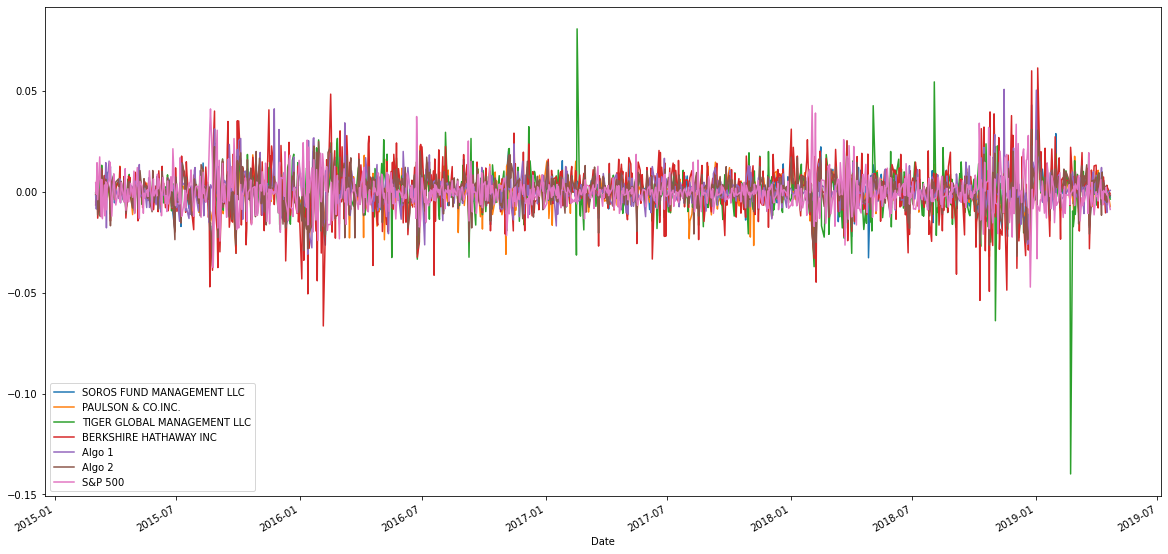

In [186]:
# Plot daily returns
#dly_returns = joined_data.pct_change()
joined_data.plot(figsize = [20,10])

&lt;matplotlib.axes._subplots.AxesSubplot at 0x1ec825cbaf0&gt;

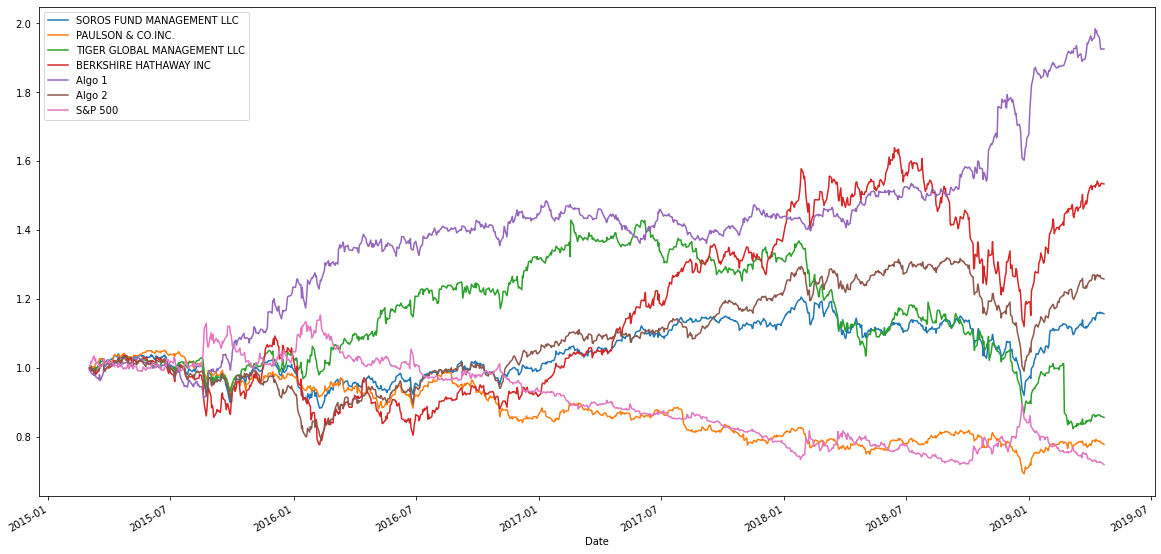

In [187]:
# Plot cumulative returns
cumulative_returns = (1+joined_data).cumprod()
cumulative_returns.plot(figsize = [20,10])

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

&lt;matplotlib.axes._subplots.AxesSubplot at 0x1ec8263a400&gt;

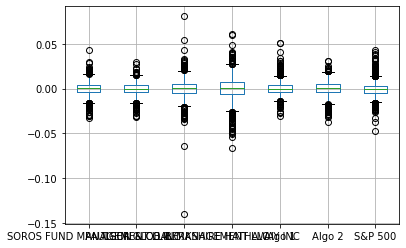

In [188]:
# Box plot to visually show risk
joined_data.boxplot()

In [189]:
# Daily Standard Deviations
#dly_returns.head()
# Calculate the standard deviation for each portfolio. 
#CALC DAILY RETURN FOR EACH PORTFORLIO
joined_data. std()
#annual_whale = dly_whale * np.sqrt(252)
#annualized_std=daily_std * np.sqrt(252) # for entire porfolio
#whale_returns algo_returns, sp500
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON &amp; CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&amp;P 500                        0.008587
dtype: float64

In [190]:
# Determine which portfolios are riskier than the S&P 500
joined_data.std()>joined_data["S&P 500"].std()    

SOROS FUND MANAGEMENT LLC      False
PAULSON &amp; CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&amp;P 500                        False
dtype: bool

In [191]:
# Calculate the annualized standard deviation (252 trading days)
#dly_returns= joined_data.pct_change().dropna()
annualized_std=joined_data.std() * np.sqrt(252)
annualized_std.head()

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON &amp; CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

&lt;matplotlib.axes._subplots.AxesSubplot at 0x1ec842c0d90&gt;

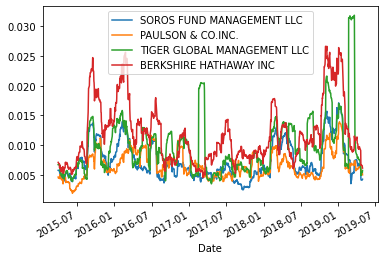

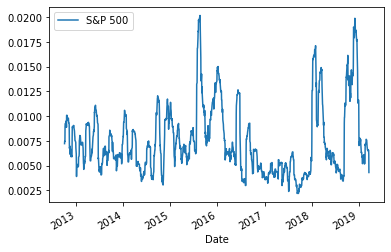

In [192]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
dly_whaleplot = whale_returns.rolling(window=21).std().plot()
dly_sp500plot = returns.rolling(window=21).std().plot()
dly_whaleplot
dly_sp500plot

&lt;matplotlib.axes._subplots.AxesSubplot at 0x1ec843544c0&gt;

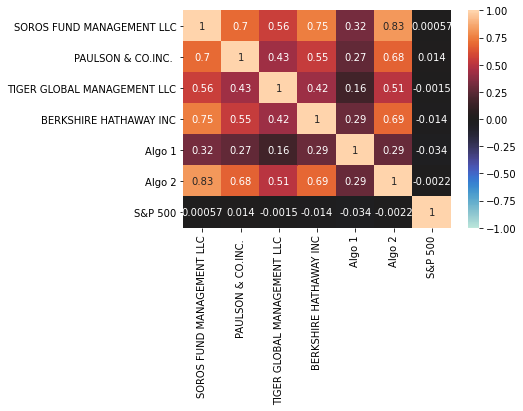

In [193]:
# Construct a correlation table
sns.heatmap(joined_data.corr(), annot=True, vmax=1, vmin=-1, cmap="icefire")

&lt;matplotlib.axes._subplots.AxesSubplot at 0x1ec8443d430&gt;

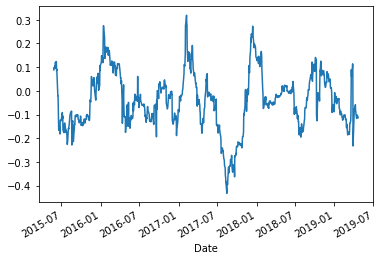

In [194]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
covariance=joined_data["Algo 1"].rolling(window=60).cov(joined_data["S&P 500"])
variance=joined_data["S&P 500"].rolling(window =60).var()
beta=covariance/variance
beta.plot()

&lt;matplotlib.axes._subplots.AxesSubplot at 0x1ec84656790&gt;

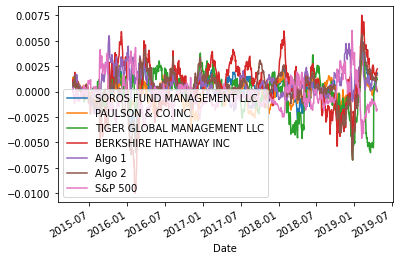

In [238]:
# Calculate a rolling window using the exponentially weighted moving average. 
joined_data.rolling(window=30).mean().plot()

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [196]:
# Calculate annualized Sharpe Ratios

sharpe_ratios = (joined_data.mean() *252 /(joined_data.std()*np.sqrt(252)))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON &amp; CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&amp;P 500                       -0.518582
dtype: float64

&lt;matplotlib.axes._subplots.AxesSubplot at 0x1ec8443dd30&gt;

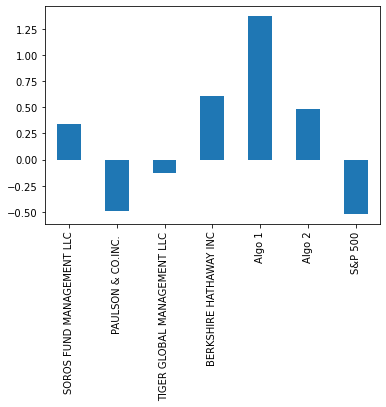

In [197]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [198]:
# Read the first stock
amzn = pd.read_csv("Resources/amzn.csv",index_col="Date", parse_dates=True, infer_datetime_format=True)
amzn.rename(columns={'Close': 'amzn'}, inplace=True)
amzn_returns = amzn.pct_change()
amzn_returns.head()
#amzn.head()


,amzn
Date,
2020-01-02,NaN
2020-01-03,-0.012139
2020-01-06,0.014886
2020-01-07,0.002092
2020-01-08,-0.007809


In [199]:
# Read the second stock
conoco = pd.read_csv("Resources/conoco.csv",index_col="Date", parse_dates=True, infer_datetime_format=True)
conoco.rename(columns={'Close': 'conoco'}, inplace=True)
conoco_returns = conoco.pct_change()
conoco_returns.head()

#conoco.head()


,conoco
Date,
2020-01-02,NaN
2020-01-03,0.003666
2020-01-06,0.011872
2020-01-07,0.000000
2020-01-08,-0.023165


In [200]:
# Read the third stock
google = pd.read_csv("Resources/google.csv",index_col="Date", parse_dates=True, infer_datetime_format=True)
google.rename(columns={'Close': 'google'}, inplace=True)
google_returns = google.pct_change()
google_returns.head()
#google.head()


,google
Date,
2020-01-02,NaN
2020-01-03,-0.004907
2020-01-06,0.024657
2020-01-07,-0.000624
2020-01-08,0.007880


In [201]:
# Concatenate all stocks into a single DataFrame
combined_data =pd.concat([amzn_returns, conoco_returns, google_returns], axis="columns", join="inner")
combined_data = combined_data.dropna()
combined_data.head()

,amzn,conoco,google
Date,,,
2020-01-03,-0.012139,0.003666,-0.004907
2020-01-06,0.014886,0.011872,0.024657
2020-01-07,0.002092,0.000000,-0.000624
2020-01-08,-0.007809,-0.023165,0.007880
2020-01-09,0.004799,0.017401,0.011044


In [202]:
# Reset the index
combined_data.reset_index(drop=True)

,amzn,conoco,google
0,-0.012139,0.003666,-0.004907
1,0.014886,0.011872,0.024657
2,0.002092,0.000000,-0.000624
3,-0.007809,-0.023165,0.007880
4,0.004799,0.017401,0.011044
...,...,...,...
183,0.006644,0.020656,0.009242
184,0.024949,0.002976,0.011671
185,0.025498,0.000297,0.013537
186,-0.009190,-0.037081,0.003284


In [236]:
# Pivot so that each column of prices represents a unique symbol
combined_data = combined_data.pivot_table(values="NOCP", index="Trade Date"), columns="Symbol")
combined_data.head()

SyntaxError: unmatched &#39;)&#39; (&lt;ipython-input-236-3d57b59955da&gt;, line 2)

In [170]:
# Drop Nulls
combined_data = combined_data.dropna()
combined_data.tail()

,amzn,conoco,google
Date,,,
2020-09-24,0.006644,0.020656,0.009242
2020-09-25,0.024949,0.002976,0.011671
2020-09-28,0.025498,0.000297,0.013537
2020-09-29,-0.009190,-0.037081,0.003284
2020-09-30,0.001224,0.011707,0.000184


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [240]:
# Calculate weighted portfolio returns
combined_returns = combined_data.pct_change()
#combined_returns.head()
#weights = [1/3, 1/3, 1/3]
amzn_weight = .333
conoco_weight = .333
google_weight = .333
portfolio_returns = amzn_weight * combined_returns["amzn"] + conoco_weight * combined_returns["conoco"] + google_weight * combined_returns["google"]
portfolio_returns.head()
#.dot 

Date
2020-01-03         NaN
2020-01-06   -2.002258
2020-01-07   -0.960638
2020-01-08        -inf
2020-01-09   -0.987094
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [230]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
all_data = pd.concat([whale_returns, algo_returns, returns, amzn_returns, conoco_returns, google_returns], axis="columns", join="outer")
# all_data = all_data.dropna()
all_data.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,amzn,conoco,google
Date,,,,,,,,,,
2012-10-01,NaN,NaN,NaN,NaN,NaN,NaN,-0.000872,NaN,NaN,NaN
2012-10-02,NaN,NaN,NaN,NaN,NaN,NaN,-0.003611,NaN,NaN,NaN
2012-10-03,NaN,NaN,NaN,NaN,NaN,NaN,-0.007123,NaN,NaN,NaN
2012-10-04,NaN,NaN,NaN,NaN,NaN,NaN,0.000322,NaN,NaN,NaN
2012-10-05,NaN,NaN,NaN,NaN,NaN,NaN,0.003469,NaN,NaN,NaN


In [233]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_data = all_data.dropna()
all_data.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,amzn,conoco,google
Date,,,,,,,,,,


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [235]:
# Risk
combined_data.std()* np.sqrt(252)

amzn      0.401275
conoco    0.765981
google    0.413606
dtype: float64

In [209]:
# Risk



combined_data.std()> joined_data["S&P 500"].std()

amzn      True
conoco    True
google    True
dtype: bool

&lt;matplotlib.axes._subplots.AxesSubplot at 0x1ec847ae610&gt;

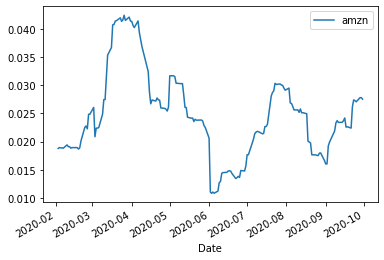

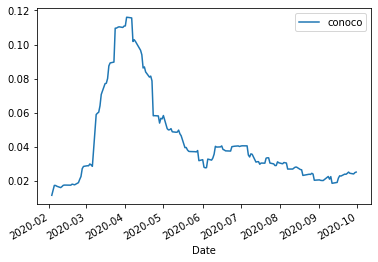

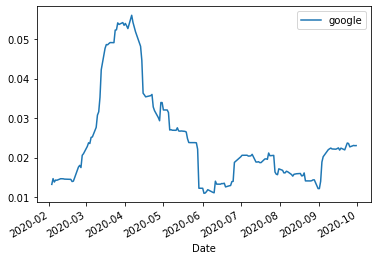

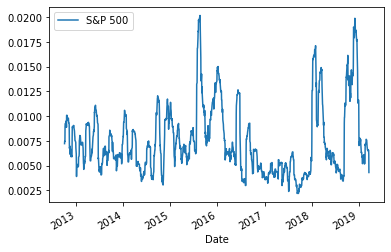

In [215]:
# Rolling
dly_amznplot = amzn_returns.rolling(window=21).std().plot()
dly_conocoplot = conoco_returns.rolling(window=21).std().plot()
dly_googleplot = google_returns.rolling(window=21).std().plot()
dly_sp500plot = returns.rolling(window=21).std().plot()
dly_amznplot
dly_conocoplot
dly_googleplot
dly_sp500plot


In [220]:
# Annualized Sharpe Ratios
shrp_ratios = (combined_data.mean() *252 /(combined_data.std()*np.sqrt(252)))
shrp_ratios


amzn      1.892102
conoco   -0.819004
google    0.440391
dtype: float64

&lt;matplotlib.axes._subplots.AxesSubplot at 0x1ec85aaae50&gt;

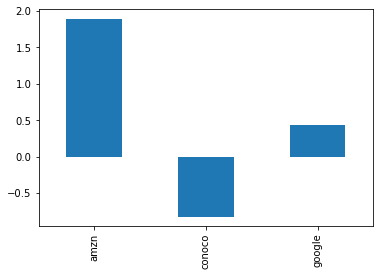

In [221]:
# Visualize the sharpe ratios as a bar plot
shrp_ratios.plot(kind="bar")

&lt;matplotlib.axes._subplots.AxesSubplot at 0x1ec845e60a0&gt;

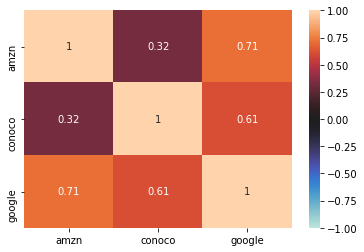

In [229]:
# Create a correlation analysis
sns.heatmap(combined_data.corr(), annot=True, vmax=1, vmin=-1, cmap="icefire")



&lt;matplotlib.axes._subplots.AxesSubplot at 0x1ec84964e50&gt;

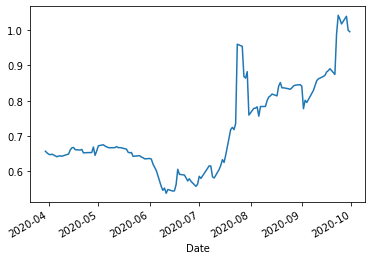

In [219]:
# Beta
covariance=combined_data["amzn"].rolling(window=60).cov(combined_data["google"])
variance=combined_data["google"].rolling(window =60).var()
beta=covariance/variance
beta.plot()
